# Week 2

In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
for n in range(-4,4):
    print(n)

-4
-3
-2
-1
0
1
2
3


In [3]:
# range(start,stop,step)
for n in range(4,-4,-2):
    print(n)

4
2
0
-2


In [5]:
x = np.linspace(-5,5,100)

In [6]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

### Distance

In [6]:
# p1 and p2 are array
def eudist(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))
  
def mandist(p1,p2):
    return np.sum(np.abs(p1-p2))

def hamdist(p1,p2):
    return np.sum((list((p1-p2) != 0))*1)

def cosdist(p1,p2):
    return np.dot(p1,p2)/(np.sqrt(np.dot(p1,p1)*np.dot(p2,p2)))

In [7]:
p1 = np.array([1,2,3])
p2 = np.array([1,0,0])
print(eudist(p1,p2), eudist(p1,p2), eudist(p1,p2), cosdist(p1,p2))

3.605551275463989 3.605551275463989 3.605551275463989 0.2672612419124244


In [8]:
p = np.array([1,3,5,2,6,0,1])
q = np.array([0,1,0,4,2,5,2])
r = np.array([2,1,3,7,0,4,3])

In [9]:
print(eudist(p,q), eudist(q,r), eudist(p,r))
print(mandist(p,q), mandist(q,r), mandist(p,r))
print(hamdist(p,q), hamdist(q,r), hamdist(p,r))
print(cosdist(p,q), cosdist(q,r), cosdist(p,r))

8.717797887081348 5.291502622129181 9.486832980505138
20 12 22
7 6 7
0.40555355282690636 0.8291561975888498 0.4524322889411796


### Ploting probability density, sigmoid

In [10]:
# density  function
def pd(x,mu,sd):
    zm = ((x-mu)**2)/(2*sd**2)
    sc = np.sqrt(2*np.pi)*sd
    return np.exp(-zm/sc)
     
# sigmoid function
def f1(x):
    return np.exp(x)/(1+np.exp(x))

def f2(x):
    return 1/(1+np.exp(-x))

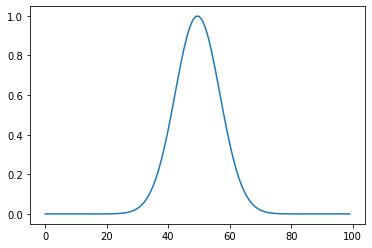

In [11]:
x = np.linspace(-5,5,100)
plt.plot(pd(x,0,0.6))

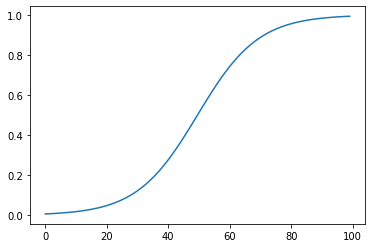

In [12]:
plt.plot(f1(x))

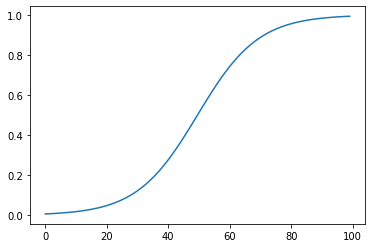

In [13]:
plt.plot(f2(x))

### Linear Regression

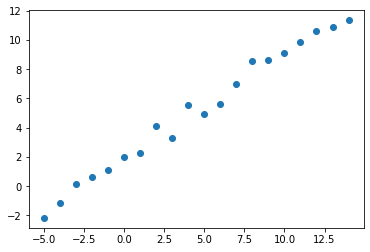

In [215]:
def createLR_dataset(m,c):
    X = []
    Y = []
    for i in range(-5,15):
        X.append(i)
        Y.append(m*i + c + 2*np.random.rand())
    return X,Y

[X,Y] = createLR_dataset(0.7,1)
plt.scatter(X,Y)

m =  0.7152163922939678
c =  1.882092452020725


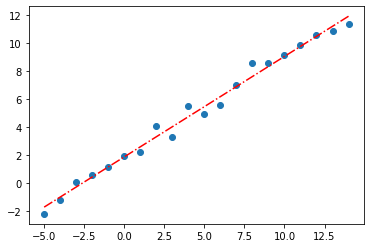

In [216]:
# solve
mux = np.array(X) - np.mean(X)
muy = np.array(Y) - np.mean(Y)
m = np.dot(mux,muy)/np.dot(mux,mux)
c = np.mean(Y) - m*np.mean(X)
print("m = ", m)
print("c = ", c)
plt.scatter(X,Y)
plt.plot(X,m*np.array(X)+c,'r-.')

In [217]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(np.reshape(X,[-1,1]),np.reshape(Y,[-1,1]))
print(reg.coef_)

[[0.71521639]]


### Logistic Regression (naive approach)

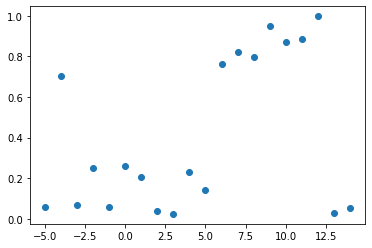

In [218]:
def createLogR_dataset():
    X = []
    PX = []
    for i in range(-5,15):
        X.append(i)
        if i <= 5:
            if np.random.rand() < 0.9:
                PX.append(0 + np.random.rand()*0.3)
            else:
                PX.append(1 - np.random.rand()*0.3)
        else:
            if np.random.rand() < 0.9:
                PX.append(1 - np.random.rand()*0.3)
            else:
                PX.append(0 + np.random.rand()*0.3)
            
    return X,PX

[X,PX] = createLogR_dataset()
plt.scatter(X,PX)

In [219]:
X

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [220]:
PX = np.array(PX)
np.mean(PX)

0.4103224329254413

In [221]:
PX

array([0.05913459, 0.70440574, 0.06957062, 0.24852263, 0.05604867,
       0.25969421, 0.20579121, 0.03882445, 0.02391159, 0.23283817,
       0.14223108, 0.76118971, 0.82053435, 0.79795925, 0.9485092 ,
       0.87184367, 0.88433329, 0.99775277, 0.02946641, 0.05388703])

In [222]:
Y = np.array(Y)
Y

array([-2.17914349, -1.18322837,  0.11845865,  0.58779433,  1.12822029,
        1.9700368 ,  2.24787002,  4.09235381,  3.30352837,  5.53573275,
        4.90173981,  5.59837023,  6.99917005,  8.57527695,  8.58921506,
        9.11477067,  9.81852049, 10.57926681, 10.87377041, 11.3396007 ])

In [223]:
# Tasks
# fit a linear rgression
# fit a logistic regression

m =  0.027039572486995265
c =  0.2886443567339626


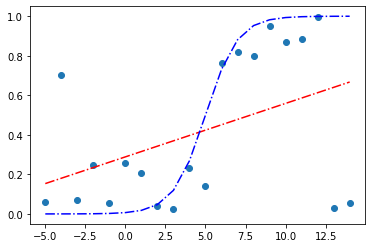

In [224]:
# naive way
mux = np.array(X) - np.mean(X)
muy = np.array(PX) - np.mean(PX)
m = np.dot(mux,muy)/np.dot(mux,mux)
c = np.mean(PX) - m*np.mean(X)
print("m = ", m)
print("c = ", c)
plt.scatter(X,PX)
plt.plot(X,m*np.array(X)+c,'r-.')
plt.plot(X,f1(np.array(X)-5),'b-.')

(-0.1, 1.1)

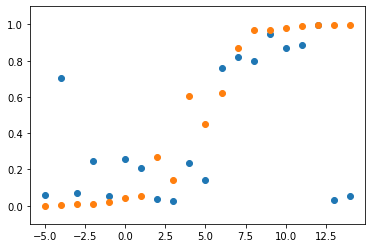

In [225]:
plt.scatter(X,PX)
plt.scatter(X,np.exp(Y-np.mean(Y))/(1+np.exp(Y-np.mean(Y))))
plt.ylim([-0.1,1.1])

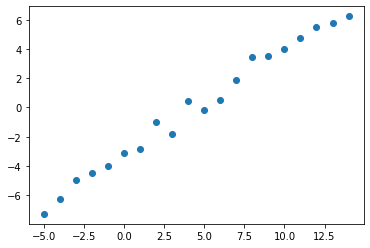

In [234]:
px = np.exp(Y-np.mean(Y))/(1+np.exp(Y-np.mean(Y)))
plt.scatter(X,np.log(px/(1-px)))
#plt.ylim([-0.1,1.1])

### Performance Evaluation

In [133]:
# Binary cases
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 1, 0]
confusion_matrix(y_true, y_pred)

array([[1, 1],
       [2, 2]])

In [134]:
# Binary case can extract tp fp fn tn
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn,fp,fn,tp)

1 1 2 2


In [135]:
# Three classes 0,1,2
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [136]:
# three classes ["ant", "bird", "cat"]
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
cm = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

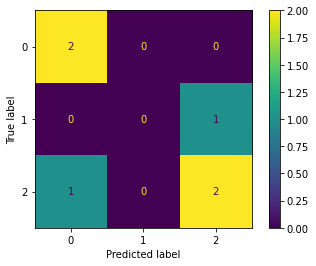

In [137]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import iris data 
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [139]:
Y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

/home/span/anaconda3/envs/tfgpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


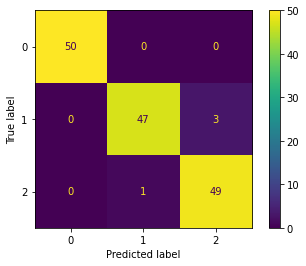

In [140]:
# Create an instance of Logistic Regression Classifier and fit the data.
clf = LogisticRegression().fit(X, Y)
y_pred = clf.predict(X)
cm = confusion_matrix(Y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [141]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

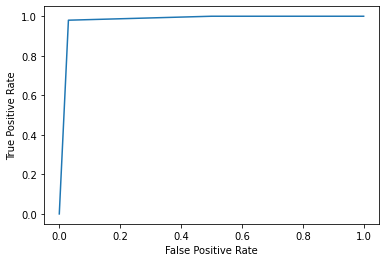

In [142]:
y_score = clf.decision_function(X)
y_score1d = np.argmax(y_score, axis=1)
fpr, tpr, _ = roc_curve(Y, y_score1d, pos_label=clf.classes_[2])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Weekly exercises

In [ ]:
# assume two strings  with equal length
# s1 = "karolin" 
# s2 = "kathrin" 
# s3 = "kerstin"
def hamstringdist(s1,s2):
    score = 0
    #
    # add your code here
    #
    return score

# assume two sets
# set1 = {1,3,2,4,5}
# set2 = {1,2,3,4,5}
# jaccarddist(set1,set2) should return 1.0
#
def jaccarddist(set1,set2):
    score = 0
    #
    # add your implementation here
    #
    return score

In [ ]:
# load iris dataset and perform OvA logistic classification
# plot the performance of the model
# import iris data 
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.


# plot Confusion matrix (Binary case, since we will do OvA)
